# Example - Clip

In [1]:
import rioxarray # for the extension to load
import xarray

%matplotlib inline

/home/snowal/miniconda3/envs/geocube/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/snowal/miniconda3/envs/geocube/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Load in xarray dataset

In [2]:
xds = xarray.open_rasterio("small_dem_3m_merged.tif")

In [3]:
xds

<xarray.DataArray (band: 1, y: 245, x: 574)>
[140630 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.616e+06 4.616e+06 4.616e+06 ... 4.615e+06 4.615e+06
  * x        (x) float64 4.25e+05 4.251e+05 4.251e+05 ... 4.268e+05 4.268e+05
Attributes:
    transform:   (3.0, 0.0, 425047.68381405267, 0.0, -3.0, 4615780.040546387)
    crs:         +init=epsg:26915
    res:         (3.0, 3.0)
    is_tiled:    0
    nodatavals:  (0.0,)

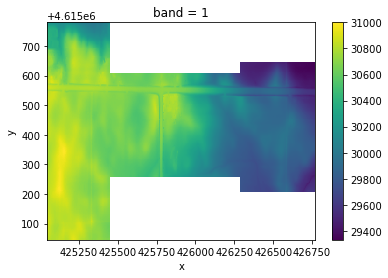

In [4]:
xds.where(xds!=xds.nodatavals[0]).plot()

## Clip using a geometry

In [5]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [425499.18381405267, 4615331.540546387],
            [425499.18381405267, 4615478.540546387],
            [425526.18381405267, 4615478.540546387],
            [425526.18381405267, 4615331.540546387],
            [425499.18381405267, 4615331.540546387]
        ]]
    }
]

In [6]:
clipped = xds.rio.clip(geometries, xds.rio.crs)

In [7]:
clipped

<xarray.DataArray (band: 1, y: 49, x: 9)>
array([[[30696, 30699, ..., 30703, 30701],
        [30694, 30697, ..., 30703, 30700],
        ...,
        [30614, 30614, ..., 30619, 30621],
        [30611, 30610, ..., 30614, 30616]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.615e+06 4.615e+06 ... 4.615e+06 4.615e+06
  * x            (x) float64 4.255e+05 4.255e+05 ... 4.255e+05 4.255e+05
    spatial_ref  int64 0
Attributes:
    transform:     (3.0, 0.0, 425500.68381405267, 0.0, -3.0, 4615477.04054638...
    _FillValue:    0.0
    grid_mapping:  spatial_ref

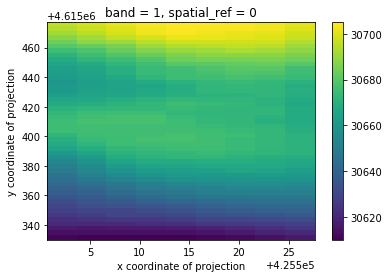

In [8]:
clipped.plot()